In [1]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install scikit-learn
# %pip install statsmodels
# %pip install numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-muted")
import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)

/var/folders/zp/p0pztj7s08s_gv0dfkcybvp80000gn/T/ipykernel_71095/1600913943.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


In [6]:
# Set path to data
data = "~/wd/GitHub/housingwages/"

In [7]:
# Import dataset from csv file
morg = pd.read_csv(data + "morg96_sample.csv")
# morg = pd.read_csv("morg96_sample.csv")
morg.head()

,hurespli,intmonth,minsamp,hrsample,serial,hhnum,state,stfips,county,centcity,msafips,cmsacode,smsastat,smsa93,icntcity,hhid,sex,veteran,grade92,famnum,selfproxy,why3594,class94,unioncov,studftpt,relref95,age,pfamrel,marital,race,hourslw,reason94,absent94,dwrsn,ind80,occ80,uhourse,laydur,paidhre,unionmme,ethnic,lfsr94,untype,ftpt94,agri,eligible,otc,earnhre,earnwke,schenr,schlvl,weight,earnwt,I25a,I25b,I25c,I25d,penatvty,pemntvty,pefntvty,prcitshp,prcitflg,peinusyr,hrlonglk,lineno,recnum,year,ym_file,ym,docc80,dind
0,2,10,8,A65,-1,1,31,39,0,2.0,80.0,28.0,1.0,6.0,NaN,910540564780043,2,6.0,44,1,1.0,NaN,1.0,2.0,NaN,3,31,2,1,1,40.0,NaN,NaN,NaN,932.0,23.0,40.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,1200.0,NaN,NaN,1936.8090,7565.0957,0,42,NaN,1.0,57,57,57,1,0,0,2,2,324929,1996,441,425,3.0,52.0
1,2,12,8,A65,-1,1,74,48,0,3.0,NaN,NaN,2.0,NaN,NaN,784604026909194,1,1.0,43,1,2.0,NaN,4.0,2.0,NaN,1,54,1,1,1,70.0,NaN,NaN,NaN,591.0,804.0,70.0,NaN,2.0,2.0,9.0,1.0,NaN,2.0,0.0,1,2.0,NaN,600.0,NaN,NaN,2992.3831,11988.6640,0,42,NaN,1.0,57,57,57,1,0,0,2,1,398711,1996,443,427,38.0,33.0
2,4,11,4,A67,-1,1,93,6,37,2.0,4480.0,49.0,1.0,7.0,NaN,100609557499178,1,6.0,40,1,2.0,NaN,4.0,2.0,NaN,3,36,2,1,4,60.0,NaN,NaN,NaN,331.0,796.0,60.0,NaN,1.0,2.0,8.0,1.0,NaN,2.0,0.0,1,1.0,1100.0,700.0,NaN,NaN,2265.2522,9296.6758,0,0,0.0,0.0,231,231,231,5,40,11,2,2,337350,1996,442,439,37.0,11.0
3,1,2,8,A64,-1,1,84,8,0,2.0,2080.0,34.0,1.0,5.0,NaN,99934705075897,2,6.0,43,0,1.0,NaN,4.0,2.0,NaN,2,24,0,7,1,41.0,NaN,NaN,NaN,820.0,204.0,24.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,570.0,2.0,NaN,2349.9756,9491.6416,0,0,NaN,0.0,110,120,120,4,0,6,2,1,37863,1996,433,417,13.0,42.0
4,1,9,4,A66,-1,1,41,27,37,2.0,5120.0,NaN,1.0,6.0,NaN,799800018720972,2,6.0,43,1,1.0,NaN,7.0,NaN,NaN,1,48,1,1,1,35.0,NaN,NaN,NaN,891.0,285.0,25.0,NaN,NaN,NaN,8.0,1.0,NaN,2.0,0.0,2,NaN,NaN,NaN,NaN,NaN,3010.0200,12186.4130,0,0,NaN,NaN,57,57,57,1,0,0,2,1,282485,1996,440,437,20.0,45.0


In [6]:
morg.shape

(66072, 71)

In [7]:
morg.describe()

,hurespli,intmonth,minsamp,hhnum,state,stfips,county,centcity,msafips,cmsacode,smsastat,smsa93,icntcity,hhid,sex,veteran,grade92,famnum,selfproxy,why3594,class94,unioncov,studftpt,relref95,age,pfamrel,marital,race,hourslw,reason94,absent94,dwrsn,ind80,occ80,uhourse,laydur,paidhre,unionmme,ethnic,lfsr94,untype,ftpt94,agri,eligible,otc,earnhre,earnwke,schenr,schlvl,weight,earnwt,I25a,I25b,I25c,I25d,penatvty,pemntvty,pefntvty,prcitshp,prcitflg,peinusyr,hrlonglk,lineno,recnum,year,ym_file,ym,docc80,dind
count,66072.000000,66072.000000,66072.000000,66072.000000,66072.000000,66072.000000,66072.000000,55983.000000,48213.000000,23502.000000,65888.000000,48307.000000,4304.000000,6.607200e+04,66072.000000,66072.000000,66072.000000,66072.000000,65949.000000,4775.000000,61042.000000,46132.000000,1430.000000,66072.000000,66072.000000,66072.000000,66072.000000,66072.000000,60583.00000,1425.000000,134.000000,90.000000,61042.000000,61042.000000,56628.000000,16.000000,54062.000000,54062.000000,65877.000000,66072.000000,74.000000,66072.000000,61042.000000,66072.000000,54062.000000,31656.000000,54062.000000,7176.000000,1430.000000,66072.000000,66072.000000,66072.000000,66072.000000,31675.000000,54062.000000,66072.000000,66072.000000,66072.000000,66072.00000,66072.000000,66072.000000,66072.000000,66072.000000,66072.000000,66072.0,66072.000000,66072.000000,61042.000000,61042.000000
mean,1.597954,6.591521,5.987347,1.064944,53.298114,28.394857,24.822996,2.000125,4463.813515,52.882436,1.229116,5.200551,1.190056,5.013763e+14,1.444833,5.592899,40.138591,0.815746,1.513943,15.017382,4.099636,1.980187,1.274825,2.837193,40.561055,1.281345,3.003526,1.216688,43.67788,5.569825,6.074627,8.400000,568.663052,357.123063,42.194780,6.500000,1.414080,1.853317,7.663206,1.339281,3.027027,2.254071,0.026605,1.181771,1.809811,1055.144459,560.360420,1.800725,1.675524,2200.593614,8809.148553,0.260897,3.597878,0.257080,0.228626,79.933436,86.219639,85.896946,1.38340,0.145705,0.852661,1.990011,1.620263,203259.987483,1996.0,437.591521,428.132643,21.798073,30.646555
std,0.817281,3.427854,1.999975,0.262258,25.963298,15.450938,59.185421,0.734296,2518.532892,26.998951,0.420267,1.676523,0.533022,3.211381e+14,0.496951,1.252624,2.626975,0.443112,0.511030,6.719772,1.173893,0.139358,0.446582,3.127409,13.965099,0.948230,2.580666,0.636942,11.54813,3.106637,3.291883,3.407856,278.642577,255.541848,9.697456,8.294577,0.492567,0.353793,1.294442,1.145731,1.595996,1.302930,0.160926,0.385659,0.392454,585.821051,365.247316,0.399483,0.468342,1047.346038,4199.631241,2.975476,11.744491,0.437031,0.419952,72.879954,79.571003,78.925093,1.10698,1.985990,2.691818,0.140992,0.921807,115325.140290,0.0,3.427854,7.347309,13.032055,13.687768
min,0.000000,1.000000,4.000000,1.000000,11.000000,1.000000,0.000000,1.000000,80.000000,7.000000,1.000000,2.000000,1.000000,1.280701e+10,1.000000,1.000000,31.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,0.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000,10.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,25.000000,0.000000,1.000000,1.000000,64.697800,265.171200,0.000000,0.000000,0.000000,0.000000,57.000000,57.000000,57.000000,1.00000,0.000000,0.000000,0.000000,1.000000,18.000000,1996.0,432.000000,416.000000,1.000000,1.000000
25%,1.000000,4.000000,4.000000,1.000000,32.000000,15.000000,0.000000,1.000000,2080.000000,31.000000,1.000000,4.000000,1.000000,2.004100e+14,1.000000,6.000000,39.000000,1.000000,1.000000,10.000000,4.000000,2.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,40.00000,4.000000,4.000000,7.000000,351.000000,157.000000,40.000000,2.000000,1.000000,2.000000,8.000000,1.000000,2.000000,2.000000,0.000000,1.000000,2.000000,670.000000,300.000000,2.000000,1.000000,1576.159100,6304.190650,0.000000,0.000000,0.000000,0.000000,57.000000,57.000000,57.000000,1.00000,0.000000,0.000000,2.000000,1.000000,104827.750000,1996.0,435.000000,422.000000,10.0000

In [8]:
# Complex Conditional Filtering with Boolean Operators
# age >= 25 & age <= 55
# hourslw >= 35
# class94 != 6 | 7

# Defining the conditions
cond = ((morg['age']>=25)&(morg['age']<=55)&(morg['hourslw']>=35)&(morg['class94']!=6)&(morg['class94']!=7))
morg = morg.loc[cond] # Filtering the dataframe
morg = morg.reset_index() # Resetting the index
morg = morg.drop(columns=['index']) # Dropping the old index
morg.head()

,hurespli,intmonth,minsamp,hrsample,serial,hhnum,state,stfips,county,centcity,msafips,cmsacode,smsastat,smsa93,icntcity,hhid,sex,veteran,grade92,famnum,selfproxy,why3594,class94,unioncov,studftpt,relref95,age,pfamrel,marital,race,hourslw,reason94,absent94,dwrsn,ind80,occ80,uhourse,laydur,paidhre,unionmme,ethnic,lfsr94,untype,ftpt94,agri,eligible,otc,earnhre,earnwke,schenr,schlvl,weight,earnwt,I25a,I25b,I25c,I25d,penatvty,pemntvty,pefntvty,prcitshp,prcitflg,peinusyr,hrlonglk,lineno,recnum,year,ym_file,ym,docc80,dind
0,2,10,8,A65,-1,1,31,39,0,2.0,80.0,28.0,1.0,6.0,NaN,910540564780043,2,6.0,44,1,1.0,NaN,1.0,2.0,NaN,3,31,2,1,1,40.0,NaN,NaN,NaN,932.0,23.0,40.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,1200.0,NaN,NaN,1936.8090,7565.0957,0,42,NaN,1.0,57,57,57,1,0,0,2,2,324929,1996,441,425,3.0,52.0
1,2,12,8,A65,-1,1,74,48,0,3.0,NaN,NaN,2.0,NaN,NaN,784604026909194,1,1.0,43,1,2.0,NaN,4.0,2.0,NaN,1,54,1,1,1,70.0,NaN,NaN,NaN,591.0,804.0,70.0,NaN,2.0,2.0,9.0,1.0,NaN,2.0,0.0,1,2.0,NaN,600.0,NaN,NaN,2992.3831,11988.6640,0,42,NaN,1.0,57,57,57,1,0,0,2,1,398711,1996,443,427,38.0,33.0
2,4,11,4,A67,-1,1,93,6,37,2.0,4480.0,49.0,1.0,7.0,NaN,100609557499178,1,6.0,40,1,2.0,NaN,4.0,2.0,NaN,3,36,2,1,4,60.0,NaN,NaN,NaN,331.0,796.0,60.0,NaN,1.0,2.0,8.0,1.0,NaN,2.0,0.0,1,1.0,1100.0,700.0,NaN,NaN,2265.2522,9296.6758,0,0,0.0,0.0,231,231,231,5,40,11,2,2,337350,1996,442,439,37.0,11.0
3,1,8,4,A66,-1,1,93,6,7,NaN,1620.0,NaN,1.0,2.0,NaN,90986304039619,2,6.0,40,1,2.0,NaN,4.0,2.0,NaN,3,54,2,1,1,40.0,NaN,NaN,NaN,812.0,447.0,40.0,NaN,1.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,1200.0,480.0,NaN,NaN,3669.6304,14838.9910,0,0,0.0,0.0,57,57,57,1,0,0,2,2,237825,1996,439,436,30.0,42.0
4,2,12,8,A65,-1,1,64,28,0,2.0,NaN,NaN,1.0,NaN,NaN,810450067380062,1,6.0,44,1,2.0,NaN,4.0,2.0,NaN,1,32,1,1,1,45.0,NaN,NaN,NaN,710.0,25.0,45.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,1000.0,NaN,NaN,1579.0817,6318.2573,0,42,NaN,1.0,57,57,57,1,0,0,2,1,384563,1996,443,427,3.0,34.0


In [10]:
print(morg.shape[0], morg.shape[1])

43483 71


In [11]:
# grade92 : highest grade completed by individual
# Creating a dictionary to map the values for the estimates of workers' years of schooling completed
grade2eduyear = {
    31: 0,  32: 2.5, 33: 5.5, 34: 7.5, 35: 9,  36: 10, 37: 11, 38: 12, 
    39: 12, 40: 13,  41: 14,  42: 14,  43: 16, 44: 18, 45: 20, 46: 22
}
# grade92 -> eduyear
morg['eduyear'] = morg['grade92'].map(grade2eduyear)
morg.head()

,hurespli,intmonth,minsamp,hrsample,serial,hhnum,state,stfips,county,centcity,msafips,cmsacode,smsastat,smsa93,icntcity,hhid,sex,veteran,grade92,famnum,selfproxy,why3594,class94,unioncov,studftpt,relref95,age,pfamrel,marital,race,hourslw,reason94,absent94,dwrsn,ind80,occ80,uhourse,laydur,paidhre,unionmme,ethnic,lfsr94,untype,ftpt94,agri,eligible,otc,earnhre,earnwke,schenr,schlvl,weight,earnwt,I25a,I25b,I25c,I25d,penatvty,pemntvty,pefntvty,prcitshp,prcitflg,peinusyr,hrlonglk,lineno,recnum,year,ym_file,ym,docc80,dind,eduyear
0,2,10,8,A65,-1,1,31,39,0,2.0,80.0,28.0,1.0,6.0,NaN,910540564780043,2,6.0,44,1,1.0,NaN,1.0,2.0,NaN,3,31,2,1,1,40.0,NaN,NaN,NaN,932.0,23.0,40.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,1200.0,NaN,NaN,1936.8090,7565.0957,0,42,NaN,1.0,57,57,57,1,0,0,2,2,324929,1996,441,425,3.0,52.0,18.0
1,2,12,8,A65,-1,1,74,48,0,3.0,NaN,NaN,2.0,NaN,NaN,784604026909194,1,1.0,43,1,2.0,NaN,4.0,2.0,NaN,1,54,1,1,1,70.0,NaN,NaN,NaN,591.0,804.0,70.0,NaN,2.0,2.0,9.0,1.0,NaN,2.0,0.0,1,2.0,NaN,600.0,NaN,NaN,2992.3831,11988.6640,0,42,NaN,1.0,57,57,57,1,0,0,2,1,398711,1996,443,427,38.0,33.0,16.0
2,4,11,4,A67,-1,1,93,6,37,2.0,4480.0,49.0,1.0,7.0,NaN,100609557499178,1,6.0,40,1,2.0,NaN,4.0,2.0,NaN,3,36,2,1,4,60.0,NaN,NaN,NaN,331.0,796.0,60.0,NaN,1.0,2.0,8.0,1.0,NaN,2.0,0.0,1,1.0,1100.0,700.0,NaN,NaN,2265.2522,9296.6758,0,0,0.0,0.0,231,231,231,5,40,11,2,2,337350,1996,442,439,37.0,11.0,13.0
3,1,8,4,A66,-1,1,93,6,7,NaN,1620.0,NaN,1.0,2.0,NaN,90986304039619,2,6.0,40,1,2.0,NaN,4.0,2.0,NaN,3,54,2,1,1,40.0,NaN,NaN,NaN,812.0,447.0,40.0,NaN,1.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,1200.0,480.0,NaN,NaN,3669.6304,14838.9910,0,0,0.0,0.0,57,57,57,1,0,0,2,2,237825,1996,439,436,30.0,42.0,13.0
4,2,12,8,A65,-1,1,64,28,0,2.0,NaN,NaN,1.0,NaN,NaN,810450067380062,1,6.0,44,1,2.0,NaN,4.0,2.0,NaN,1,32,1,1,1,45.0,NaN,NaN,NaN,710.0,25.0,45.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,1000.0,NaN,NaN,1579.0817,6318.2573,0,42,NaN,1.0,57,57,57,1,0,0,2,1,384563,1996,443,427,3.0,34.0,18.0


| Type | `workertype` |
| ----------- | ----------- |
| federal government | "federal" |
| state government | "state" |
| local government | "local" |
| private sector | "private" |

In [12]:
# Creating a new column for the different employment types
workertype_dict = {1: 'federal', 2: 'state', 3: 'local', 4: 'private', 5: 'private'}
morg["workertype"] = morg.class94.map(workertype_dict)
morg = morg[morg["workertype"].isin(['federal', 'state', 'local', 'private'])]
morg = morg.dropna(subset=["workertype"]) # drop rows if workertype is NaN
morg["workertype"] = morg["workertype"].astype(str) # convert workertype to str
morg.head()

,hurespli,intmonth,minsamp,hrsample,serial,hhnum,state,stfips,county,centcity,msafips,cmsacode,smsastat,smsa93,icntcity,hhid,sex,veteran,grade92,famnum,selfproxy,why3594,class94,unioncov,studftpt,relref95,age,pfamrel,marital,race,hourslw,reason94,absent94,dwrsn,ind80,occ80,uhourse,laydur,paidhre,unionmme,ethnic,lfsr94,untype,ftpt94,agri,eligible,otc,earnhre,earnwke,schenr,schlvl,weight,earnwt,I25a,I25b,I25c,I25d,penatvty,pemntvty,pefntvty,prcitshp,prcitflg,peinusyr,hrlonglk,lineno,recnum,year,ym_file,ym,docc80,dind,eduyear,workertype
0,2,10,8,A65,-1,1,31,39,0,2.0,80.0,28.0,1.0,6.0,NaN,910540564780043,2,6.0,44,1,1.0,NaN,1.0,2.0,NaN,3,31,2,1,1,40.0,NaN,NaN,NaN,932.0,23.0,40.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,1200.0,NaN,NaN,1936.8090,7565.0957,0,42,NaN,1.0,57,57,57,1,0,0,2,2,324929,1996,441,425,3.0,52.0,18.0,federal
1,2,12,8,A65,-1,1,74,48,0,3.0,NaN,NaN,2.0,NaN,NaN,784604026909194,1,1.0,43,1,2.0,NaN,4.0,2.0,NaN,1,54,1,1,1,70.0,NaN,NaN,NaN,591.0,804.0,70.0,NaN,2.0,2.0,9.0,1.0,NaN,2.0,0.0,1,2.0,NaN,600.0,NaN,NaN,2992.3831,11988.6640,0,42,NaN,1.0,57,57,57,1,0,0,2,1,398711,1996,443,427,38.0,33.0,16.0,private
2,4,11,4,A67,-1,1,93,6,37,2.0,4480.0,49.0,1.0,7.0,NaN,100609557499178,1,6.0,40,1,2.0,NaN,4.0,2.0,NaN,3,36,2,1,4,60.0,NaN,NaN,NaN,331.0,796.0,60.0,NaN,1.0,2.0,8.0,1.0,NaN,2.0,0.0,1,1.0,1100.0,700.0,NaN,NaN,2265.2522,9296.6758,0,0,0.0,0.0,231,231,231,5,40,11,2,2,337350,1996,442,439,37.0,11.0,13.0,private
3,1,8,4,A66,-1,1,93,6,7,NaN,1620.0,NaN,1.0,2.0,NaN,90986304039619,2,6.0,40,1,2.0,NaN,4.0,2.0,NaN,3,54,2,1,1,40.0,NaN,NaN,NaN,812.0,447.0,40.0,NaN,1.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,1200.0,480.0,NaN,NaN,3669.6304,14838.9910,0,0,0.0,0.0,57,57,57,1,0,0,2,2,237825,1996,439,436,30.0,42.0,13.0,private
4,2,12,8,A65,-1,1,64,28,0,2.0,NaN,NaN,1.0,NaN,NaN,810450067380062,1,6.0,44,1,2.0,NaN,4.0,2.0,NaN,1,32,1,1,1,45.0,NaN,NaN,NaN,710.0,25.0,45.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,1000.0,NaN,NaN,1579.0817,6318.2573,0,42,NaN,1.0,57,57,57,1,0,0,2,1,384563,1996,443,427,3.0,34.0,18.0,private


## Exploratory Data Analysis

In [13]:
summary_stats = morg.groupby('workertype')['earnwke'].agg(['mean', 'std', 'min', 'max']).reset_index()
summary_stats

,workertype,mean,std,min,max
0,federal,722.912909,338.927968,0.0,1923.0
1,local,629.525976,327.148456,0.0,1923.0
2,private,605.993831,373.231066,0.0,1923.0
3,state,623.705412,327.744852,0.0,1923.0


### Table of Summary Statistics
| workertype | mean | std | min | max |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| federal | 722.912909 | 338.927.148456 | 0.0 | 1923.0 |
| local | 629.525976 | 327.148456 | 0.0 | 1923.0 |
| private | 605.993831 | 373.231066 | 0.0 | 1923.0 |
| state | 623.705412 | 327.744852 | 0.0 | 1923.0 |

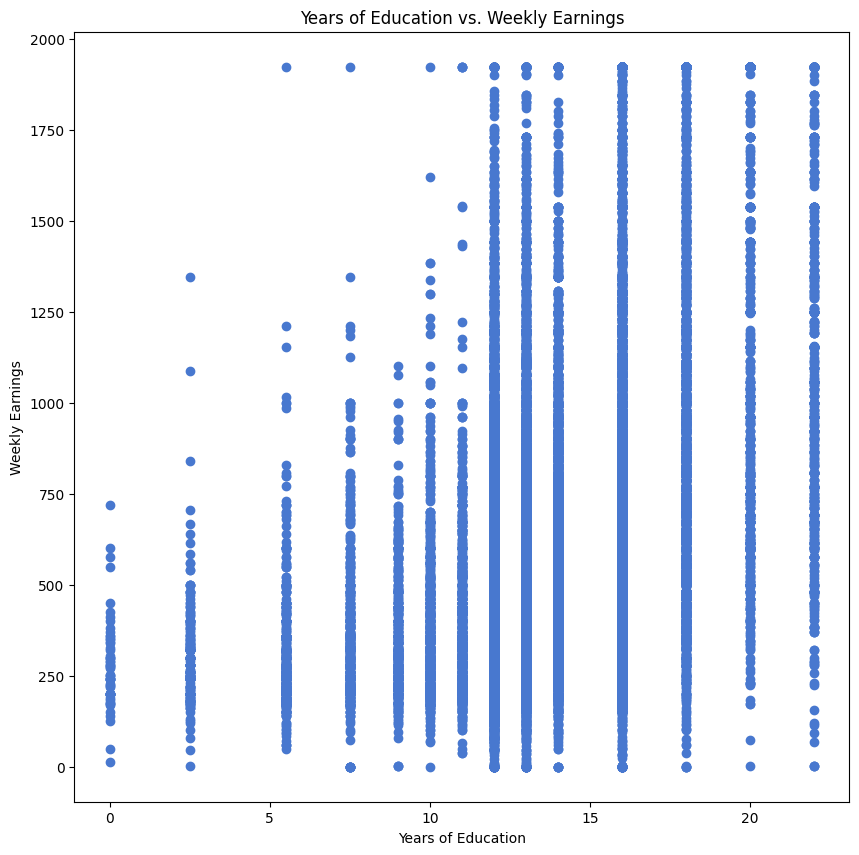

In [14]:
# Scatterplot for years of education and weekly earnings
plt.figure(figsize=(10, 10))
plt.scatter(morg.eduyear, morg.earnwke)

plt.xlabel("Years of Education")
plt.ylabel("Weekly Earnings")
plt.title("Years of Education vs. Weekly Earnings")

plt.show()

<Axes: title={'center': 'Distributions of Education Level by Type of Worker'}, xlabel='Type of Worker', ylabel='Years of Education'>

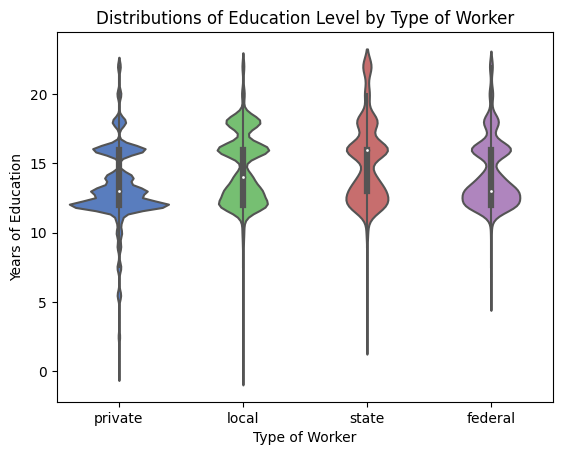

In [15]:
# Violin plots for employment type and level of education
datavis = sns.violinplot(data=morg, x="workertype", y="eduyear", order=["private", "local", "state", "federal"], scale='area', orient="v")
datavis.set(xlabel="Type of Worker", ylabel="Years of Education", title="Distributions of Education Level by Type of Worker")
datavis

Let's try using a classification model to predict whether a worker is a private sector worker, a local government worker, a state government worker, or a federal government worker based on the demographic variables. This is the most time-consuming question in the entire data task, so feel free to work on other parts first and then return to this question later. 

Relevant demographic variables: `grade92`, `age`, `marital`, `race`, `ethnic`, `penatvty`, `prcitshp`. 

**Use a classification model of your choice that is available in sklearn and classify `workertype` (private, local, state, or federal) using the demographic variables listed above. We will test if your classification model can achieve accuracy greater than 50\%.** 

Note: There's no need to convert `workertype` column to numeric values since it is the label. 

Hint: use `.values` when assigning x and y if you get a warning that looks like `UserWarning: X does not have valid feature names, but ... was fitted with feature name`. For example, `df["x"].values` or `df[["a", "b"]].values`.

In [ ]:
morg_class = morg.copy().dropna(subset=["workertype", "grade92", "age", "marital", "race", "ethnic", "penatvty", "prcitshp"])

# preprocessing (regularization, features, etc.)
...

# train-test split
x = ... # see hint
y = ... # see hint
xtrain, xtest, ytrain, ytest = ...

# import sklearn model of your choice (model selection)
...

# fit the model
model = ...
...

# make prediction on `xtest`
ypred = ...

# get training and testing accuracies
train_accuracy = model.score(xtrain, ytrain)
test_accuracy = model.score(xtest, ytest)
print("Classification Report: \n", classification_report(ytest, ypred))
print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')

## Regression

#morg_housing = pd.merge(morg, pd.read_stata(data + "housing_supply.dta"))
morg_housing = pd.merge(morg, pd.read_stata("data/housing_supply.dta"))
morg_housing

In [19]:
morg_housing = pd.merge(morg, pd.read_stata(data + "housing_supply.dta"))
# morg_housing = pd.merge(morg, pd.read_stata("data/housing_supply.dta"))
morg_housing

,hurespli,intmonth,minsamp,hrsample,serial,hhnum,state,stfips,county,centcity,msafips,cmsacode,smsastat,smsa93,icntcity,hhid,sex,veteran,grade92,famnum,selfproxy,why3594,class94,unioncov,studftpt,relref95,age,pfamrel,marital,race,hourslw,reason94,absent94,dwrsn,ind80,occ80,uhourse,laydur,paidhre,unionmme,ethnic,lfsr94,untype,ftpt94,agri,eligible,otc,earnhre,earnwke,schenr,schlvl,weight,earnwt,I25a,I25b,I25c,I25d,penatvty,pemntvty,pefntvty,prcitshp,prcitflg,peinusyr,hrlonglk,lineno,recnum,year,ym_file,ym,docc80,dind,eduyear,workertype,unaval
0,2,10,8,A65,-1,1,31,39,0,2.0,80.0,28.0,1.0,6.0,NaN,910540564780043,2,6.0,44,1,1.0,NaN,1.0,2.0,NaN,3,31,2,1,1,40.0,NaN,NaN,NaN,932.0,23.0,40.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,1200.0,NaN,NaN,1936.8090,7565.0957,0,42,NaN,1.0,57,57,57,1,0,0,2,2,324929,1996,441,425,3.0,52.0,18.0,federal,-0.923178
1,1,7,8,A65,-1,1,31,39,0,1.0,80.0,28.0,1.0,6.0,NaN,612391119900801,2,6.0,40,1,2.0,NaN,4.0,2.0,NaN,3,34,2,1,2,40.0,NaN,NaN,NaN,832.0,15.0,40.0,NaN,1.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,500.0,500.0,NaN,NaN,2453.8345,9320.2100,0,0,1.0,0.0,57,57,57,1,0,0,2,2,223545,1996,438,422,2.0,42.0,13.0,private,-0.923178
2,2,1,4,A65,-1,1,31,39,0,2.0,80.0,28.0,1.0,6.0,NaN,39253790699493,1,6.0,40,1,1.0,NaN,4.0,2.0,NaN,1,33,1,5,1,40.0,NaN,NaN,NaN,732.0,229.0,40.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,750.0,NaN,NaN,2017.1431,7887.1279,0,0,NaN,0.0,57,57,57,1,0,0,2,1,23381,1996,432,429,15.0,37.0,13.0,private,-0.923178
3,2,9,8,A65,-1,1,31,39,0,2.0,80.0,28.0,1.0,6.0,NaN,330900051307912,1,1.0,39,1,2.0,NaN,4.0,NaN,NaN,1,48,1,1,2,40.0,NaN,NaN,NaN,722.0,448.0,40.0,NaN,1.0,1.0,8.0,1.0,NaN,2.0,0.0,1,2.0,1150.0,460.0,NaN,NaN,2339.5935,9724.2080,0,0,0.0,0.0,57,57,57,1,0,0,2,1,291340,1996,440,424,31.0,37.0,12.0,private,-0.923178
4,3,1,8,A64,-1,1,31,39,0,1.0,80.0,28.0,1.0,6.0,NaN,903039960339180,1,1.0,40,1,2.0,NaN,4.0,2.0,NaN,1,46,1,1,1,50.0,NaN,NaN,NaN,631.0,266.0,NaN,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,2.0,NaN,360.0,NaN,NaN,1959.2803,7988.2217,0,0,NaN,0.0,57,57,57,1,0,0,2,1,23206,1996,432,416,19.0,33.0,13.0,private,-0.923178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,1,9,4,A66,-1,1,86,4,27,NaN,9360.0,NaN,1.0,2.0,NaN,914679770399001,1,6.0,40,0,1.0,NaN,4.0,2.0,NaN,2,33,0,7,1,60.0,NaN,NaN,NaN,500.0,26.0,40.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,0.0,1,1.0,NaN,375.0,NaN,NaN,2014.7697,8016.4658,0,0,NaN,0.0,57,57,57,1,0,0,2,1,268264,1996,440,437,3.0,32.0,13.0,private,-0.907219
29016,1,7,4,A66,-1,1,86,4,27,NaN,9360.0,NaN,1.0,2.0,NaN,38730540991697,2,6.0,39,1,1.0,NaN,4.0,2.0,NaN,1,34,1,5,1,40.0,NaN,NaN,NaN,700.0,313.0,40.0,NaN,2.0,2.0,1.0,1.0,NaN,2.0,0.0,1,2.0,NaN,346.0,NaN,NaN,2249.9490,8861.6201,0,0,NaN,0.0,57,57,57,1,0,0,2,1,200936,1996,438,435,23.0,34.0,12.0,private,-0.907219
29017,2,9,8,A65,-1,1,86,4,27,NaN,9360.0,NaN,1.0,2.0,NaN,964559530506005,1,6.0,34,1,2.0,NaN,4.0,2.0,NaN,1,47,1,1,1,40.0,NaN,NaN,NaN,10.0,475.0,40.0,NaN,1.0,2.0,3.0,1.0,NaN,2.0,1.0,1,1.0,1650.0,693.0,NaN,NaN,2190.4802,8658.2588,0,0,1.0,1.0,315,315,315,5,0,4,2,1,268230,1996,440,424,43.0,2.0,7.5,private,-0.907219
29018,1,12,8,A65,-1,1,86,4,27,NaN,9360.0,NaN,1.0,2.0,NaN,114020760420007,1,6.0,43,1,1.0,NaN,4.0,2.0,NaN,1,26,1,1,1,50.0,NaN,NaN,NaN,882.0,63.0,50.0,NaN,1.0,2.0,8.0,1.0,NaN,2.0,0.0,1,1.0,1250.0,687.0,NaN,NaN,2412.1731,9651.6416,0,0,0.0,0.0,57,57,57,1,0,0,2,1,369546,1996,443,427,12.0,45.0,16.0,private,-0.907219


In [22]:
# Generating ln(weekly earnings)
morg_housing["lnearnwke"] = np.log(morg_housing["earnwke"] + 10e-8) # adding 10e-8 to avoid log(0)

OLS_log_wages = morg_housing[(morg_housing['workertype'].isin(['local', 'private']))] # filter `morg_housing`

# Generating 0/1 binary variable of whether the worker is employed by the local government or not
# naming new column `local`
OLS_log_wages["local"] = OLS_log_wages['workertype'].apply(lambda x: 1 if x == 'local' else 0)

# run regression
X1 = sm.add_constant(OLS_log_wages[['local']])
y1 = OLS_log_wages.lnearnwke

model_1 = sm.OLS(y1, X1, missing="drop").fit() # fit the model and save it as `model_1` (OLS)

model_1.summary() # print summary

/var/folders/zp/p0pztj7s08s_gv0dfkcybvp80000gn/T/ipykernel_71095/3308230745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OLS_log_wages["local"] = OLS_log_wages['workertype'].apply(lambda x: 1 if x == 'local' else 0)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lnearnwke   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.25
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           0.000798
Time:                        17:10:08   Log-Likelihood:                -39287.
No. Observations:               26752   AIC:                         7.858e+04
Df Residuals:                   26750   BIC:                         7.859e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2463      0.007    927.413      0.000       6.233       6.260
local          0.0753      0.022      3.354      0.001       0.031       0.119
==============================================================================
Omnibus:                    50491.298   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        104694944.947
Skew:                         -14.516   Prob(JB):                         0.00
Kurtosis:                     308.094   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# GENERATE RELEVANT DEMOGRAPHIC VARIABLES FOR CONTROLS
# GENERATE DATAFRAME OLS_demographics AS A COPY OF OLS_log_wages
OLS_demographics = OLS_log_wages.copy()

# generate 0/1 binary variable of whether the worker is male ("sex"==1) or not
OLS_demographics["male"] = OLS_demographics['sex'].apply(lambda x: 1 if x == 1 else 0)

# generate 0/1 binary variable of whether the worker is black or not
# 'black' if "race"==2
OLS_demographics["black"] = OLS_demographics['race'].apply(lambda x: 1 if x == 2 else 0)

# generate 0/1 binary variable of whether the worker is hispanic or not
# 'hispanic' if "ethnic"!=8
OLS_demographics["hispanic"] = OLS_demographics['ethnic'].apply(lambda x: 1 if x != 8 else 0)

# AGE SQUARED
OLS_demographics["agesq"] = OLS_demographics['age'] ** 2

# run regression
X2 = sm.add_constant(OLS_demographics[['local']])
y2 = OLS_demographics.lnearnwke
z2_1 = OLS_demographics.male
z2_2 = OLS_demographics.black
z2_3 = OLS_demographics.hispanic
z2_4 = OLS_demographics.agesq
z2 = pd.concat([z2_1, z2_2, z2_3, z2_4], axis=1)
X = pd.concat([X2, z2], axis=1)

model_2 = sm.OLS(y2, X, missing="drop").fit() # fit the model and save it as `model_2` (OLS)

model_2.summary() # print summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lnearnwke   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     249.4
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          2.41e-261
Time:                        17:10:26   Log-Likelihood:                -38683.
No. Observations:               26752   AIC:                         7.738e+04
Df Residuals:                   26746   BIC:                         7.743e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0016      0.018    327.373      0.000       5.966       6.037
local          0.1070      0.022      4.838      0.000       0.064       0.150
male           0.3016      0.013     23.650      0.000       0.277       0.327
black         -0.2902      0.020    -14.600      0.000      -0.329      -0.251
hispanic      -0.3982      0.021    -19.016      0.000      -0.439      -0.357
agesq       9.233e-05   9.55e-06      9.666      0.000    7.36e-05       0.000
==============================================================================
Omnibus:                    52010.776   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        124340071.168
Skew:                         -15.482   Prob(JB):                         0.00
Kurtosis:                     335.551   Cond. No.                     6.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Difference-in-Differences Regression
Analysis for how the local government worker-private sector wage gap differs across metropolitan statistical areas based on the amount of land available for real estate development in that area:

In [25]:
# Generating relevant variables
OLS_wagegap_landfordev = OLS_demographics.copy()
OLS_wagegap_landfordev["localgov"] = OLS_wagegap_landfordev['workertype'].apply(lambda x: 1 if x == 'local' else 0)
OLS_wagegap_landfordev["unaval_x_local"] = OLS_wagegap_landfordev.localgov * OLS_wagegap_landfordev.unaval # interaction term

# run regression
X3 = sm.add_constant(OLS_wagegap_landfordev[['local']])
y3 = OLS_wagegap_landfordev.lnearnwke

z3_1 = OLS_wagegap_landfordev.male
z3_2 = OLS_wagegap_landfordev.black
z3_3 = OLS_wagegap_landfordev.hispanic
z3_4 = OLS_wagegap_landfordev.agesq
z3_5 = OLS_wagegap_landfordev.unaval
z3_6 = OLS_wagegap_landfordev.localgov

d = OLS_wagegap_landfordev.unaval_x_local

z3 = pd.concat([z3_1, z3_2, z3_3, z3_4, z3_5, z3_6, d], axis=1)
X3_3 = pd.concat([X3, z3], axis=1)

model_3 = sm.OLS(y3, X3_3, missing="drop").fit() # fit the model and save it as `model_3` (DID)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lnearnwke   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     178.7
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          8.00e-260
Time:                        17:16:12   Log-Likelihood:                -38681.
No. Observations:               26752   AIC:                         7.738e+04
Df Residuals:                   26744   BIC:                         7.744e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.0014      0.018    327.264      0.000       5.965       6.037
local              0.0507      0.011      4.532      0.000       0.029       0.073
male               0.3016      0.013     23.650      0.000       0.277       0.327
black             -0.2899      0.020    -14.586      0.000      -0.329      -0.251
hispanic          -0.4013      0.021    -18.955      0.000      -0.443      -0.360
agesq           9.222e-05   9.55e-06      9.655      0.000    7.35e-05       0.000
unaval             0.0060      0.007      0.880      0.379      -0.007       0.020
localgov           0.0507      0.011      4.532      0.000       0.029       0.073
unaval_x_local     0.0328      0.022      1.458      0.145      -0.011       0.077
==============================================================================
Omnibus:                    52013.790   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        124371369.879
Skew:                         -15.484   Prob(JB):                         0.00
Kurtosis:                     335.593   Cond. No.                     5.74e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
len(model_3.params) # number of parameters

9